In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

data_606 = pd.read_csv('606sets.csv', index_col=False)
data_acsf = pd.read_csv('acsf20new1.csv')

data_ALL = data_606.join(data_acsf)
#data_ALL.head(2)

y = data_ALL['order'].values
excluded = ['ID', 'Formula', 'order', 'TMatom', 'co-atoms']
X = data_ALL.drop(excluded, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.2,
                                                    random_state = 57)

In [2]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)

0.9098360655737705

In [3]:
#param_grid = {'n_neighbors': np.arange(1, 11, 1),
#              'weights' : ('uniform', 'distance'),
#              'leaf_size': (20, 30, 40, 50)
#              }
#kfold = StratifiedKFold(n_splits = 10, shuffle=True,
#                        random_state = 20)
#model_knn = GridSearchCV(KNeighborsClassifier(),
#                     param_grid, cv = kfold)

#model_knn.fit(X_train, y_train)

In [4]:
#model_knn.score(X_test, y_test)

In [6]:
#model_knn.best_params_

In [7]:
#model_knn.best_score_

In [8]:
#model_knn.best_estimator_

In [9]:
model_KNN = KNeighborsClassifier(leaf_size=20, n_neighbors=9, weights='distance')
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test, y_test)

0.9016393442622951

In [10]:
y_pred = model_KNN.predict(X_test)
y_pred.shape

(122,)

[[45  5]
 [ 7 65]]


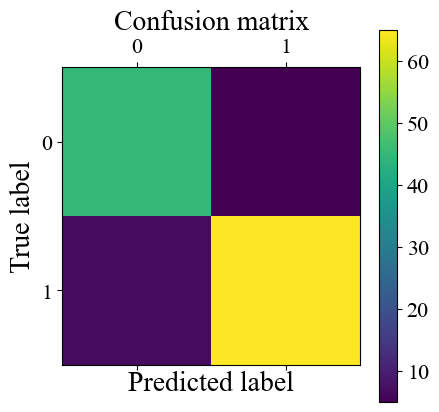

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c3.png', dpi = 300)
#plt.show()

In [12]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,45,5
1,7,65


In [13]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
print(Accuracy)

Error_rate = 1 - Accuracy
print(Error_rate)

0.9016393442622951
0.09836065573770492


In [14]:
from sklearn.metrics import f1_score
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

print(f1_score(y_test, y_pred))
cohen_kappa_score(y_test, y_pred)

Precision: 0.9285714285714286
0.9027777777777778
0.9
0.9285714285714286
0.9154929577464788


0.7979017117614577

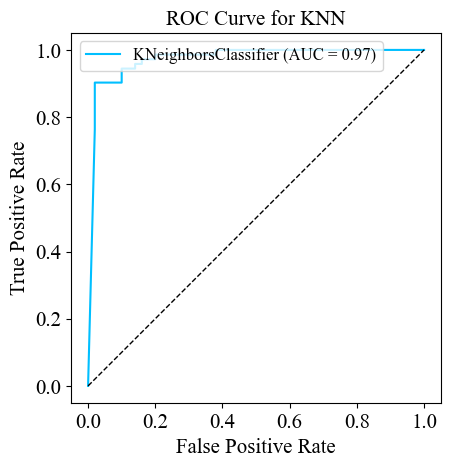

In [15]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_KNN, X_test, y_test, color = 'deepskyblue')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for KNN', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r3.png', dpi = 300)
#plt.show()